# **GROUP ASSIGNMENT - MACHINE LEARNING TECHNIQUES FOR PATTERN RECOGNITION APPLICATIONS**

--------------------
## **Introduction**
--------------------
### **Context**
--------------------

The problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience.

-----------------------
### **Objective** 
-----------------------

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. The goal of the problem is to predict whether a passenger was satisfied or not with his/her experience of travelling on Shinkansen Bullet train.

------------------------------------
### **Dataset Description**
------------------------------------

The dataset contains a random sample of individuals who traveled on this train. The dataset consists of information related to passengers and attributes related to Shinkansen train and the post-service experience. Each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’.

-----------------------
## **Prepare script**
-----------------------
### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, accuracy_score
from sklearn import tree


### **Loading the Dataset**

In [2]:
datashinkansen = pd.read_csv("datashinkansen.csv") # Read datashinkansen

-----------------------
## **Understand the data** 
-----------------------
### **Check the head and tail of the data**

In [3]:
datashinkansen.head() # Show data head

,ID,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Onboard_Wifi_Service,Ease_of_Online_Booking,Baggage_Handling,Legroom,CheckIn_Service,Cleanliness,Overall_Experience
0,98800001,0,5,Female,Needs Improvement,Green Car,Excellent,Good,Needs Improvement,Needs Improvement,Acceptable,Good,Needs Improvement,0
1,98800002,9,0,Male,Poor,Ordinary,Excellent,Good,Good,Poor,Needs Improvement,Needs Improvement,Good,0
2,98800003,77,119,Female,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Excellent,Excellent,Excellent,Good,Excellent,1
3,98800004,13,18,Female,Acceptable,Ordinary,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,0
4,98800005,0,0,Female,Acceptable,Ordinary,Acceptable,Needs Improvement,Good,Good,Good,Good,Good,1


In [4]:
datashinkansen.tail() # Show data tail

,ID,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Onboard_Wifi_Service,Ease_of_Online_Booking,Baggage_Handling,Legroom,CheckIn_Service,Cleanliness,Overall_Experience
94374,98894375,83,125,Male,Poor,Ordinary,Good,Poor,Poor,Good,Good,Needs Improvement,Good,0
94375,98894376,5,11,Male,Good,Ordinary,Good,Needs Improvement,Acceptable,Acceptable,Acceptable,Good,Acceptable,1
94376,98894377,0,0,Male,Needs Improvement,Green Car,Needs Improvement,Good,Good,Good,Good,Acceptable,Good,1
94377,98894378,0,0,Male,Needs Improvement,Ordinary,NaN,Good,Good,Good,Good,Good,Excellent,0
94378,98894379,28,28,Male,Acceptable,Ordinary,Poor,Acceptable,Acceptable,Good,Good,Poor,Good,0


### **Use the info() and describe() functions for more information**

In [5]:
datashinkansen.info() # Show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Departure_Delay_in_Mins  94379 non-null  int64 
 2   Arrival_Delay_in_Mins    94379 non-null  int64 
 3   Gender                   94302 non-null  object
 4   Seat_Comfort             94318 non-null  object
 5   Seat_Class               94379 non-null  object
 6   Arrival_Time_Convenient  85449 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Ease_of_Online_Booking   94306 non-null  object
 9   Baggage_Handling         94237 non-null  object
 10  Legroom                  94289 non-null  object
 11  CheckIn_Service          94302 non-null  object
 12  Cleanliness              94373 non-null  object
 13  Overall_Experience       94379 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 

**Observations:**
* There are 94379 participants and 14 columns
* Four categories are numerical (int64) and the other ten are objects
* It is conspicuous that not all columns have NoN-Null count of 94379. This means that not every data column has been aswered from all participants.

In [6]:
datashinkansen.describe() # Show data description

,ID,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,9.437900e+04,94379.000000,94379.000000,94379.000000
mean,9.884719e+07,14.638246,14.948463,0.546658
std,2.724501e+04,38.128961,38.377695,0.497821
min,9.880000e+07,0.000000,0.000000,0.000000
25%,9.882360e+07,0.000000,0.000000,0.000000
50%,9.884719e+07,0.000000,0.000000,1.000000
75%,9.887078e+07,12.000000,13.000000,1.000000
max,9.889438e+07,1592.000000,1584.000000,1.000000


**Observations:**
* This figure shows all integer values, which are only 4 values. That makes it hard to analyse.
* The ID column is not useful.
* For delay values the standard deviation is big. This is because most trains do not have delays, the ones that have delays then often have huge delays.

### **Look for the presence of null values in the dataset**

In [7]:
datashinkansen.isnull().sum().sum() # Shows number of null in total

9486

In [8]:
datashinkansen.isnull().sum() # Shows number of null in each column

ID                            0
Departure_Delay_in_Mins       0
Arrival_Delay_in_Mins         0
Gender                       77
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Onboard_Wifi_Service         30
Ease_of_Online_Booking       73
Baggage_Handling            142
Legroom                      90
CheckIn_Service              77
Cleanliness                   6
Overall_Experience            0
dtype: int64

**Observations:**
* There is a total number of 9486 null values
* Columns that do not have null values are `ID`, `Departure_Delay_in_Mins`, `Arrival_Delay_in_Mins`, `Seat_Class` and `Overall_Experience` 
* During preprocessing of the data the null values have to be removed or replaced 

-----------------------
## **Preprocessing** 

-----------------------
* Before the data is processed a copy of the original dataset is created to avoid changes in the original data

In [9]:
data = datashinkansen.copy() # Copy datashinkansen

### **Remove all rows with null values**
* Notice that the data get smaller by doing so, another way of dealing with null values will be executed later on

In [10]:
data = data.dropna() # Remove all rows that contain null values

### **Remove the unsignificant parameters**

In [11]:
data.nunique() # Show number of unique values for each category

ID                         85234
Departure_Delay_in_Mins      425
Arrival_Delay_in_Mins        421
Gender                         2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Onboard_Wifi_Service           6
Ease_of_Online_Booking         6
Baggage_Handling               5
Legroom                        6
CheckIn_Service                5
Cleanliness                    6
Overall_Experience             2
dtype: int64

In [12]:
data = data.drop(columns = ['ID']) # Remove ID

### **Show unique values of each row**

In [13]:
[data[col_name].unique() for col_name in data.columns] # Show unique values of each row to find values/names for encoding

[array([   0,    9,   77,   13,    1,   49,   20,   22,    2,  100,   11,
           8,   65,   76,   18,   27,   67,   62,   42,   25,   59,    7,
          57,   15,    3,    5,   16,   75,  113,   10,   84,   17,    4,
          99,  125,   96,   23,   61,   64,   19,   41,   14,  118,   54,
          69,  181,    6,   32,   81,  159,  126,   29,  154,   28,   38,
          50,   30,   98,   40,   12,  131,  107,   63,   35,   34,   33,
          37,   21,   91,   74,   51,  106,   26,  101,   44,   68,  108,
         145,  175,   43,   87,  219,   47,   95,   46,   52,   53,   36,
         147,  168,   97,   92,   80,   70,   88,  225,   48,  103,  182,
          83,   55,  235,  167,   56,   39,  119,  294,   58,  293,  272,
          94,  423,  122,   73,   45,   31,   86,  186,   78,  172,  109,
         227,  331,  138,  290,   72,   90,  117,  129,  110,  236,  258,
          89,   24,  155,  111,   60,  209,  255,  226,   71,  333,  414,
         165,  140,   85,  342,  150, 

### **Encode the categorical object variables in the data set**

In [14]:
#  Create dictionaries for  the non numerical categories
dict_scale = {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5}
dict_gender = {'Male': 0, 'Female': 1}
dict_seatclass = {'Green Car': 0, 'Ordinary': 1}

# Map numerical values to each category
data['Seat_Comfort'] = data.Seat_Comfort.map(dict_scale)
data['Arrival_Time_Convenient'] = data.Arrival_Time_Convenient.map(dict_scale)
data['Onboard_Wifi_Service'] = data.Onboard_Wifi_Service.map(dict_scale)
data['Ease_of_Online_Booking'] = data.Ease_of_Online_Booking.map(dict_scale)
data['Baggage_Handling'] = data.Baggage_Handling.map(dict_scale)
data['Legroom'] = data.Legroom.map(dict_scale)
data['CheckIn_Service'] = data.CheckIn_Service.map(dict_scale)
data['Cleanliness'] = data.Cleanliness.map(dict_scale)

data['Gender'] = data.Gender.map(dict_gender)
data['Seat_Class'] = data.Seat_Class.map(dict_seatclass)

### **Separate the dataset into Training and Testing data**

In [15]:
# Seperate the variables into input (x) and output (y)
y = data.Overall_Experience
x = data.drop(columns = ['Overall_Experience'])

In [16]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

In [17]:
# Show the shape of training and test set
print("Shape of training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
# Show distribution of output in training and test set
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set :  (59663, 12)
Shape of test set :  (25571, 12)
Percentage of classes in training set:
1    0.545916
0    0.454084
Name: Overall_Experience, dtype: float64
Percentage of classes in test set:
1    0.545892
0    0.454108
Name: Overall_Experience, dtype: float64


-----------------------
## **Perform Model Building** 
-----------------------
### **Create metric function**

In [18]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.title('Overall Experience')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Scale data**

In [19]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
x_train_scaled=sc.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x.columns)

# Transform on test data
x_test_scaled=sc.transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x.columns)

-----------------------
## **Logistic Regression**
-----------------------

### **Model 1: Unscaled Logistic Regression**
* For the first model a logistic regression without scaled input data is used
* There is a warning when fitting the model

In [20]:
# Fitting unscaled logistic regression model
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

C:\Users\matti\Documents\anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     27092
           1       0.76      0.81      0.78     32571

    accuracy                           0.75     59663
   macro avg       0.75      0.75      0.75     59663
weighted avg       0.75      0.75      0.75     59663



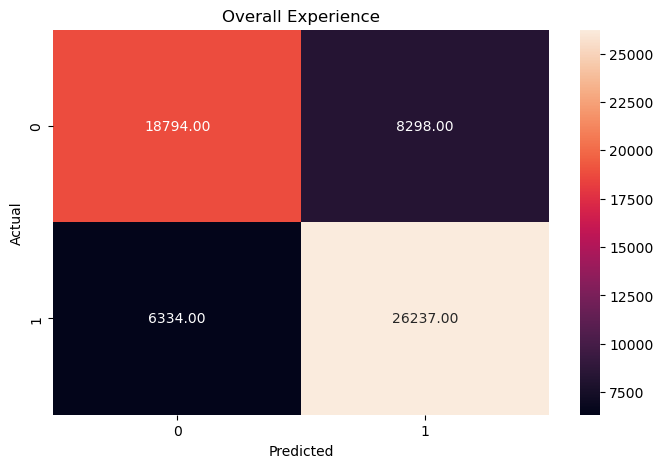

In [21]:
# Checking the performance on the training data
y_pred_train_1 = model_1.predict(x_train)
metrics_score(y_train, y_pred_train_1)

              precision    recall  f1-score   support

           0       0.75      0.70      0.73     11612
           1       0.77      0.81      0.79     13959

    accuracy                           0.76     25571
   macro avg       0.76      0.75      0.76     25571
weighted avg       0.76      0.76      0.76     25571



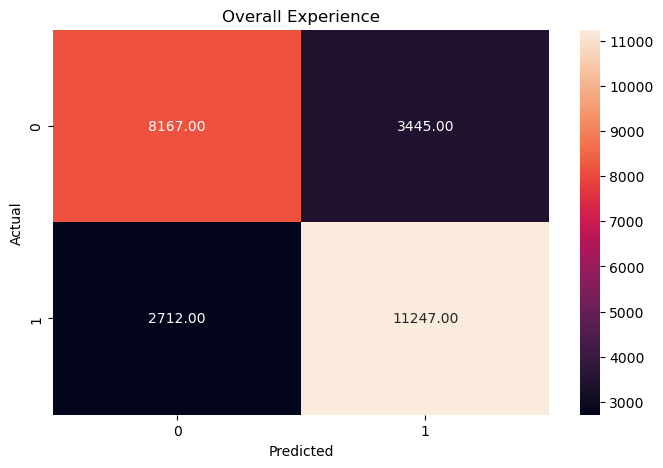

In [22]:
# Checking the performance on the test dataset
y_pred_test_1 = model_1.predict(x_test)
metrics_score(y_test, y_pred_test_1)

### **Model 2: Scaled Logistic Regression**
* For the second model a logistic regression is used as well, but this time with scaled input data

In [23]:
# Fitting logistic regression model

model_2 = LogisticRegression()
model_2.fit(x_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     27092
           1       0.76      0.81      0.78     32571

    accuracy                           0.75     59663
   macro avg       0.75      0.75      0.75     59663
weighted avg       0.75      0.75      0.75     59663



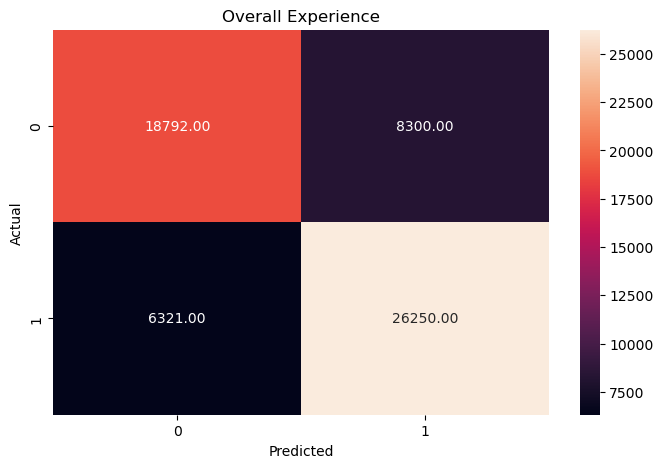

In [24]:
# Checking the performance on the training data
y_pred_train_2 = model_2.predict(x_train_scaled)
metrics_score(y_train, y_pred_train_2)

              precision    recall  f1-score   support

           0       0.75      0.70      0.73     11612
           1       0.76      0.81      0.78     13959

    accuracy                           0.76     25571
   macro avg       0.76      0.75      0.76     25571
weighted avg       0.76      0.76      0.76     25571



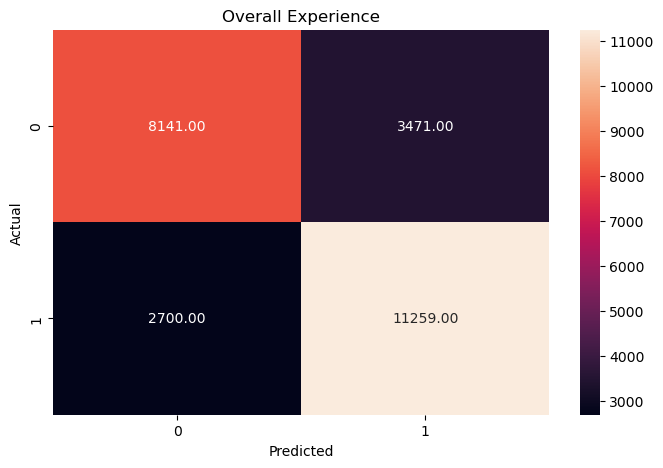

In [25]:
# Checking the performance on the test dataset
y_pred_test_2 = model_2.predict(x_test_scaled)
metrics_score(y_test, y_pred_test_2)

### Check coefficients of logistic regression

In [26]:
# Printing the coefficients of logistic regression
cols=x.columns

coef_2=model_2.coef_

pd.DataFrame(coef_2, columns=cols).T.sort_values(by = 0,ascending = False)

,0
Ease_of_Online_Booking,0.818355
Seat_Comfort,0.539115
CheckIn_Service,0.532552
Gender,0.434253
Legroom,0.319938
Baggage_Handling,0.071711
Departure_Delay_in_Mins,0.056062
Cleanliness,0.012056
Seat_Class,-0.005203
Onboard_Wifi_Service,-0.045105


**Observations:**
* Features which **positively affect** the `Overall_Experience` are: `Ease_of_Online_Booking`, `Seat_Comfort`, `CheckIn_Service`, `Gender`, `Legroom`, `Baggage_Handling`, `Departure_Delay_in_Mins` and `Cleanliness`
* Features wich **negatively affect** the `Overall_Experience` are: `Seat_Class`, `Onboard_Wifi_Service`, `Arrival_Delay_in_Mins` and `Arrival_Time_Convenient`

-----------------------
## **Decision Trees**
-----------------------

### **Model 3: Decision Tree**
* For the third model a decision tree is used

In [27]:
model_3 = DecisionTreeClassifier()
model_3.fit(x_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27092
           1       0.99      0.99      0.99     32571

    accuracy                           0.99     59663
   macro avg       0.99      0.99      0.99     59663
weighted avg       0.99      0.99      0.99     59663



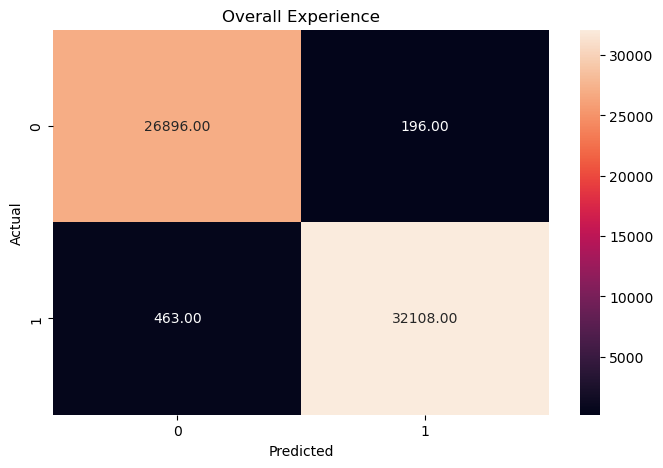

In [28]:
# Checking performance on the training dataset
y_pred_train_3 = model_3.predict(x_train)
metrics_score(y_train,y_pred_train_3)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     11612
           1       0.87      0.87      0.87     13959

    accuracy                           0.86     25571
   macro avg       0.86      0.86      0.86     25571
weighted avg       0.86      0.86      0.86     25571



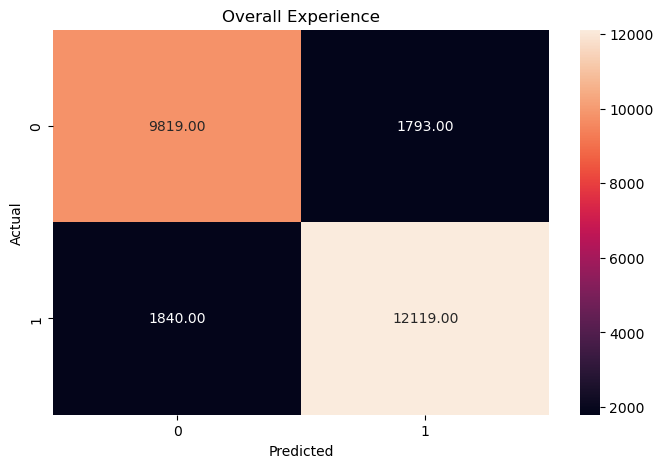

In [29]:
# Checking performance on the test dataset
y_pred_test_3 = model_3.predict(x_test)
metrics_score(y_test,y_pred_test_3)

### **Model 4: Weighted Decision Tree**
* For the fourth model a weighted decision tree is used

In [30]:
# Building weighted decision tree model
model_4 = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
model_4.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27092
           1       0.98      1.00      0.99     32571

    accuracy                           0.99     59663
   macro avg       0.99      0.99      0.99     59663
weighted avg       0.99      0.99      0.99     59663



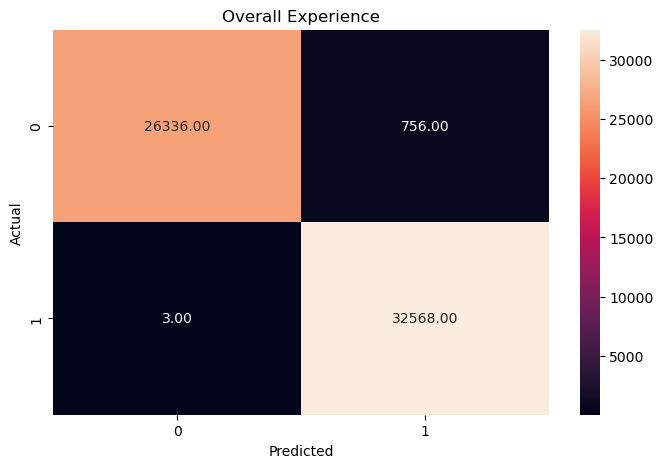

In [31]:
# Checking performance on the training dataset
y_pred_train_4 = model_4.predict(x_train)
metrics_score(y_train,y_pred_train_4)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     11612
           1       0.87      0.87      0.87     13959

    accuracy                           0.86     25571
   macro avg       0.86      0.86      0.86     25571
weighted avg       0.86      0.86      0.86     25571



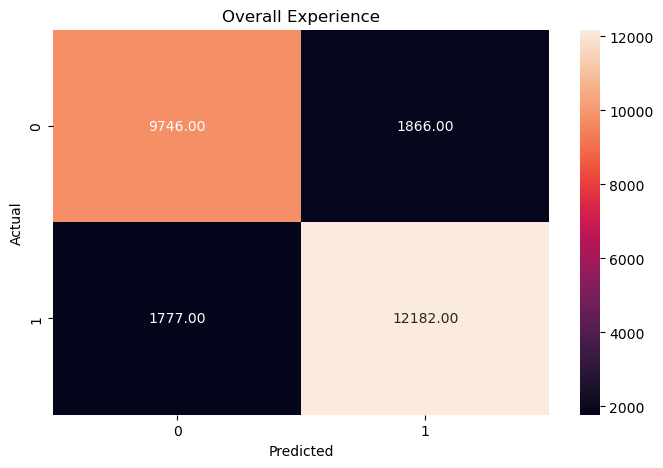

In [32]:
# Checking performance on the test dataset
y_pred_test_4 = model_4.predict(x_test)
metrics_score(y_test,y_pred_test_4)

### **Model 5: Decision Tree with Entropy and max Depth**
* For the fifth model a decision tree with entropy and max depth is used

In [33]:
# Building decision tree model with entropy and max depth
model_5 = DecisionTreeClassifier(criterion="entropy", max_depth=15)
model_5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     27092
           1       0.93      0.92      0.93     32571

    accuracy                           0.92     59663
   macro avg       0.92      0.92      0.92     59663
weighted avg       0.92      0.92      0.92     59663



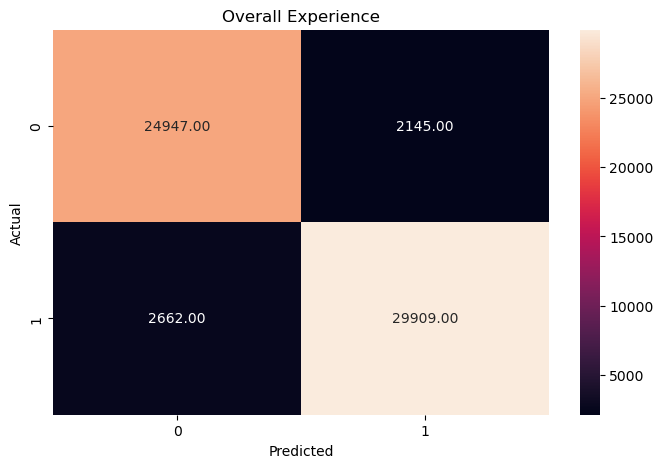

In [34]:
# Checking performance on the training dataset
y_pred_train_5 = model_5.predict(x_train)
metrics_score(y_train,y_pred_train_5)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     11612
           1       0.90      0.88      0.89     13959

    accuracy                           0.88     25571
   macro avg       0.88      0.88      0.88     25571
weighted avg       0.88      0.88      0.88     25571



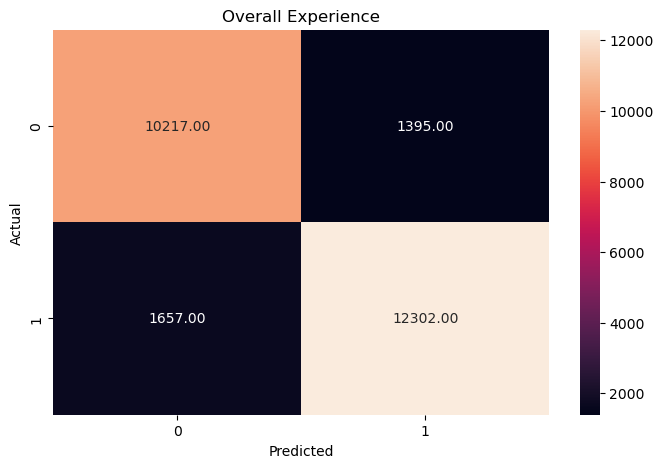

In [35]:
# Checking performance on the test dataset
y_pred_test_5 = model_5.predict(x_test)
metrics_score(y_test,y_pred_test_5)

### **Visualize Decision Tree**

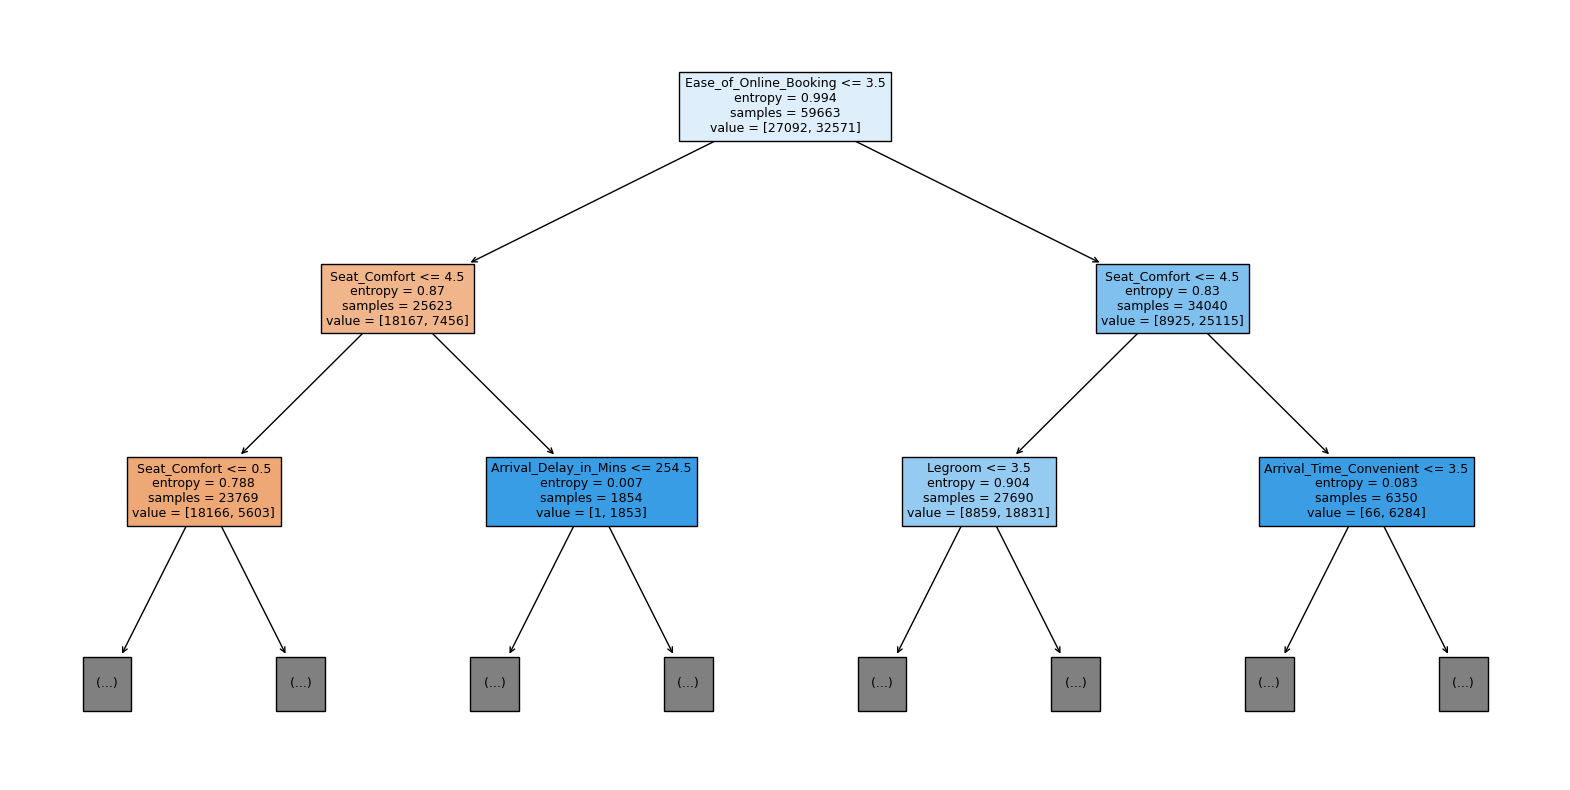

In [36]:
feature_names = list(x_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_5,max_depth=2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### **Check Importances of Features**

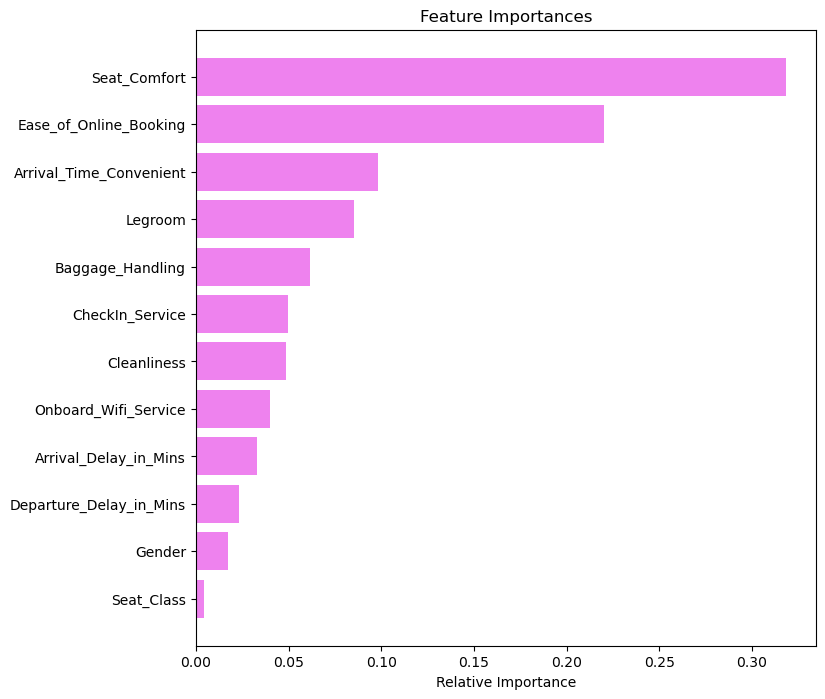

In [37]:
importances = model_5.feature_importances_
indices = np.argsort(importances)
feature_names = list(x_train.columns)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* `Seat_Comfort`is the most important feature, followed by `Ease_of_Online_Booking`
* The least important features are `Seat_Class` and `Gender`

-----------------------
## **K-Nearest-Neighbors**
-----------------------

### **Model 6: K-Nearest-Neighbors**
* For the sixth model a k-nearest-neighbors model is used with the scaled input data
* This model has been tested with different number of neighbours and 9 was found the most convenient

In [38]:
#parameter ‘n_neighbors’ is the tuning parameter
model_6 = KNeighborsClassifier(n_neighbors = 9)
model_6.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     27092
           1       0.90      0.89      0.90     32571

    accuracy                           0.89     59663
   macro avg       0.89      0.89      0.89     59663
weighted avg       0.89      0.89      0.89     59663



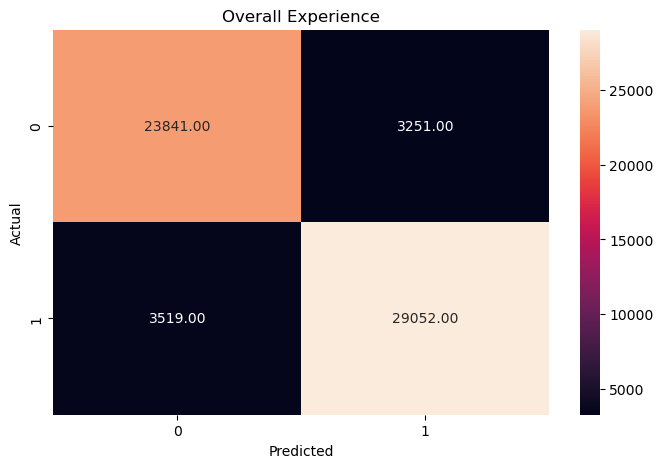

In [39]:
# Checking performance on the training dataset
y_pred_train_6 = model_6.predict(x_train_scaled)
metrics_score(y_train,y_pred_train_6)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     11612
           1       0.88      0.87      0.87     13959

    accuracy                           0.86     25571
   macro avg       0.86      0.86      0.86     25571
weighted avg       0.86      0.86      0.86     25571



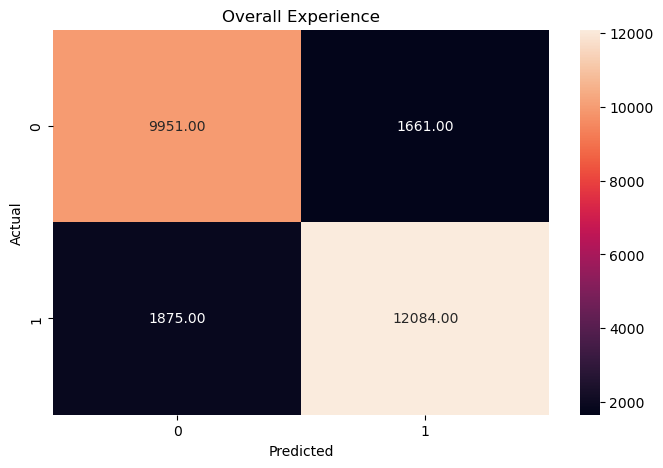

In [40]:
# Checking performance on the test dataset
y_pred_test_6 = model_6.predict(x_test_scaled)
metrics_score(y_test,y_pred_test_6)


-----------------------
## **Find Model with the highest accuracy**
-----------------------

In [41]:
# Printing the accuracy of each model
model = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
accuracy = [[accuracy_score(y_test, y_pred_test_1), accuracy_score(y_test, y_pred_test_2), accuracy_score(y_test, y_pred_test_3),
            accuracy_score(y_test, y_pred_test_4), accuracy_score(y_test, y_pred_test_5),
            accuracy_score(y_test, y_pred_test_6)]]

pd.DataFrame(accuracy, columns = model).T.sort_values(by = 0,ascending = False)

,0
Model 5,0.880646
Model 6,0.861718
Model 3,0.857925
Model 4,0.857534
Model 1,0.759219
Model 2,0.758672


**Observations:**
* Model 5 scored the highest accuracy, followed by model 6 and 3.
* Model 5 and 3 are decision trees.
* Model 6 is the k-nearest neighbor model.
* As two of the top three models are decision trees, it is chosen for the coming processes

-----------------------
## **Prepare the Data differently**
-----------------------
* The model 5 has the highest accuracy of all models
* Data preperation will now be performed differntly to investigate if the performance can be improved further
* The models are fitted with the same parameters as for model 5

### **Model 7: Replace null values with -1**
* For this model null values will be handled differntly. Instead of deleting the rows that contain null values, they are now replaced by `-1`
* There is no loss of data, but it has to be considered that the null values are represented by a actual value that is not in range of the existing values

In [42]:
data2 = datashinkansen.copy() # Copy data for safety 

data2 = data2.drop(columns = ['ID']) # Remove ID

data2['Seat_Comfort'] = data2.Seat_Comfort.map(dict_scale)
data2['Arrival_Time_Convenient'] = data2.Arrival_Time_Convenient.map(dict_scale)
data2['Onboard_Wifi_Service'] = data2.Onboard_Wifi_Service.map(dict_scale)
data2['Ease_of_Online_Booking'] = data2.Ease_of_Online_Booking.map(dict_scale)
data2['Baggage_Handling'] = data2.Baggage_Handling.map(dict_scale)
data2['Legroom'] = data2.Legroom.map(dict_scale)
data2['CheckIn_Service'] = data2.CheckIn_Service.map(dict_scale)
data2['Cleanliness'] = data2.Cleanliness.map(dict_scale)

data2['Gender'] = data2.Gender.map(dict_gender)
data2['Seat_Class'] = data2.Seat_Class.map(dict_seatclass)

data2 = data2.fillna(-1)

data2 = data2.apply(np.int64)

y2 = data2.Overall_Experience
x2 = data2.drop(columns = ['Overall_Experience'])
# Splitting the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 1, stratify = y2)

model_7 = DecisionTreeClassifier(criterion="entropy", max_depth=15)
model_7.fit(x2_train,y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     29950
           1       0.92      0.92      0.92     36115

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



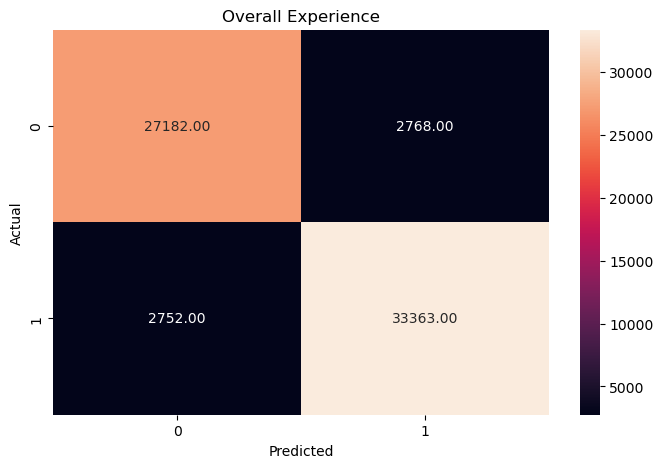

In [43]:
# Checking performance on the training dataset
y2_pred_train_7 = model_7.predict(x2_train)
metrics_score(y2_train,y2_pred_train_7)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     12836
           1       0.89      0.89      0.89     15478

    accuracy                           0.88     28314
   macro avg       0.88      0.88      0.88     28314
weighted avg       0.88      0.88      0.88     28314



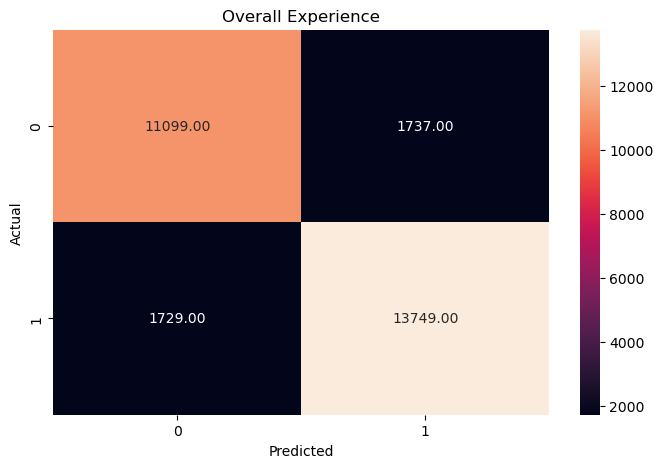

In [44]:
# Checking performance on the test dataset
y2_pred_test_7 = model_7.predict(x2_test)
metrics_score(y2_test,y2_pred_test_7)

### **Model 8: Create dummies for non numerical categories**
* For this model categorical object variables are not encoded with numbers. Instead dummies are created that represent each value

In [45]:
data3 = datashinkansen.copy() # Copy data for safety 

data3 = data3.drop(columns = ['ID']) # Remove ID

data3 = data3.dropna() # Remove rows with null values

# Creating list of dummy columns
to_get_dummies_for = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Onboard_Wifi_Service', 'Ease_of_Online_Booking',
                      'Baggage_Handling', 'Legroom',  'CheckIn_Service', 'Cleanliness', 'Gender', 'Seat_Class' ]

# Creating dummy variables
data3 = pd.get_dummies(data = data3, columns = to_get_dummies_for, drop_first = True) 

y3 = data3.Overall_Experience
x3 = data3.drop(columns = ['Overall_Experience'])

# Splitting the data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 1, stratify = y3)

model_8 = DecisionTreeClassifier(criterion="entropy", max_depth=15)
model_8.fit(x3_train,y3_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     27092
           1       0.94      0.91      0.92     32571

    accuracy                           0.91     59663
   macro avg       0.91      0.92      0.91     59663
weighted avg       0.92      0.91      0.91     59663



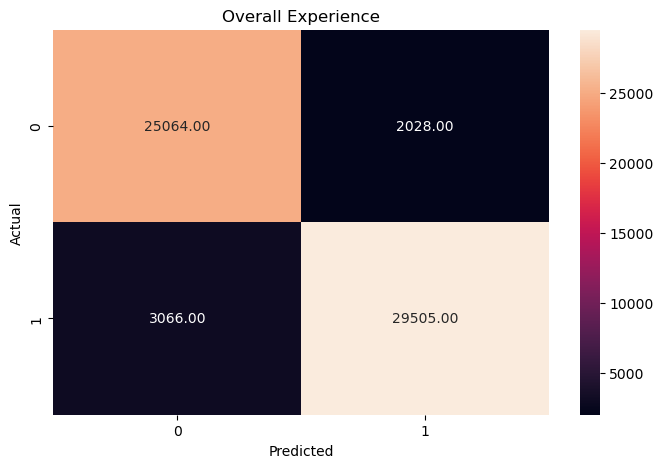

In [46]:
# Checking performance on the training dataset
y3_pred_train_8 = model_8.predict(x3_train)
metrics_score(y3_train,y3_pred_train_8)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11612
           1       0.90      0.87      0.89     13959

    accuracy                           0.88     25571
   macro avg       0.88      0.88      0.88     25571
weighted avg       0.88      0.88      0.88     25571



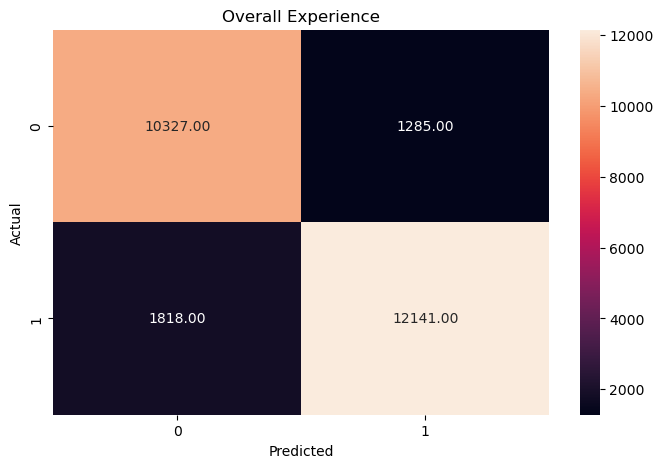

In [47]:
# Checking performance on the test dataset
y3_pred_test_8 = model_8.predict(x3_test)
metrics_score(y3_test,y3_pred_test_8)

### **Model 9: Remove features with the lowest importance**
* This time `Gender`and `Seat_Class`are removed as well as `ID`. The rest of the data preperation is done like for the first six models

In [48]:
data4 = datashinkansen.copy() # Copy data for safety 

data4 = data4.drop(columns = ['ID', 'Gender', 'Seat_Class']) # Remove ID, Gender and Seat_Class

data4 = data4.dropna() # Remove rows with null values

data4['Seat_Comfort'] = data4.Seat_Comfort.map(dict_scale)
data4['Arrival_Time_Convenient'] = data4.Arrival_Time_Convenient.map(dict_scale)
data4['Onboard_Wifi_Service'] = data4.Onboard_Wifi_Service.map(dict_scale)
data4['Ease_of_Online_Booking'] = data4.Ease_of_Online_Booking.map(dict_scale)
data4['Baggage_Handling'] = data4.Baggage_Handling.map(dict_scale)
data4['Legroom'] = data4.Legroom.map(dict_scale)
data4['CheckIn_Service'] = data4.CheckIn_Service.map(dict_scale)
data4['Cleanliness'] = data4.Cleanliness.map(dict_scale)

y4 = data4.Overall_Experience
x4 = data4.drop(columns = ['Overall_Experience'])

# Splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.3, random_state = 1, stratify = y4)

model_9 = DecisionTreeClassifier(criterion="entropy", max_depth=15)
model_9.fit(x4_train,y4_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     27118
           1       0.93      0.91      0.92     32594

    accuracy                           0.92     59712
   macro avg       0.92      0.92      0.92     59712
weighted avg       0.92      0.92      0.92     59712



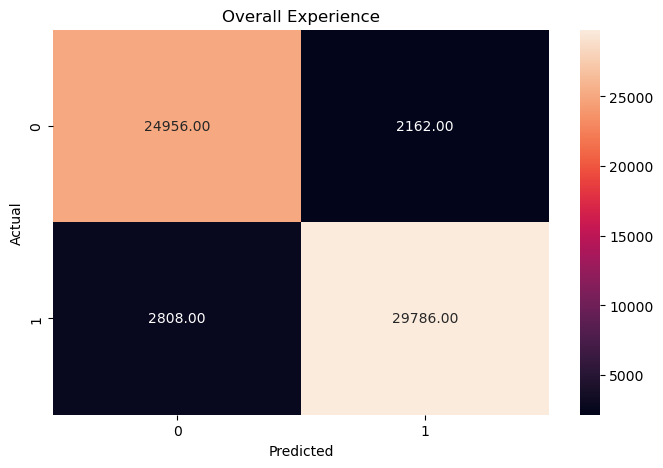

In [49]:
# Checking performance on the training dataset
y4_pred_train_9 = model_9.predict(x4_train)
metrics_score(y4_train,y4_pred_train_9)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     11622
           1       0.90      0.88      0.89     13969

    accuracy                           0.88     25591
   macro avg       0.88      0.88      0.88     25591
weighted avg       0.88      0.88      0.88     25591



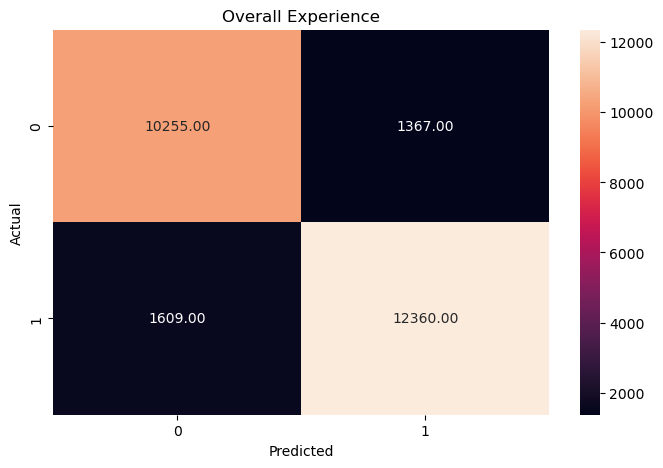

In [50]:
# Checking performance on the test dataset
y4_pred_test_9 = model_9.predict(x4_test)
metrics_score(y4_test,y4_pred_test_9)

### **Visualize Decision Tree**

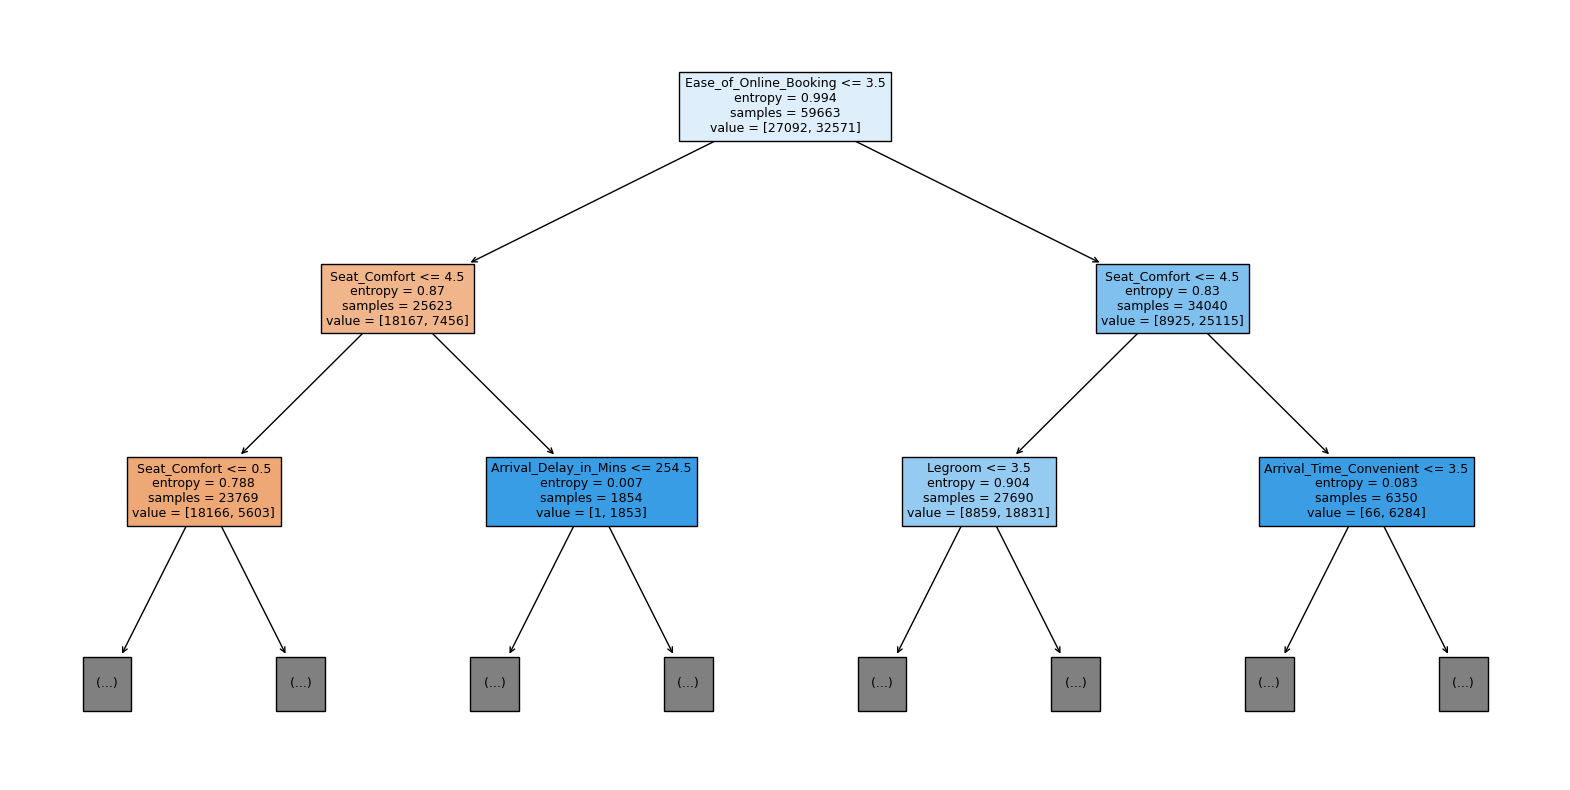

In [51]:
feature_names = list(x_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_5,max_depth=2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### **Check Importances of Features**

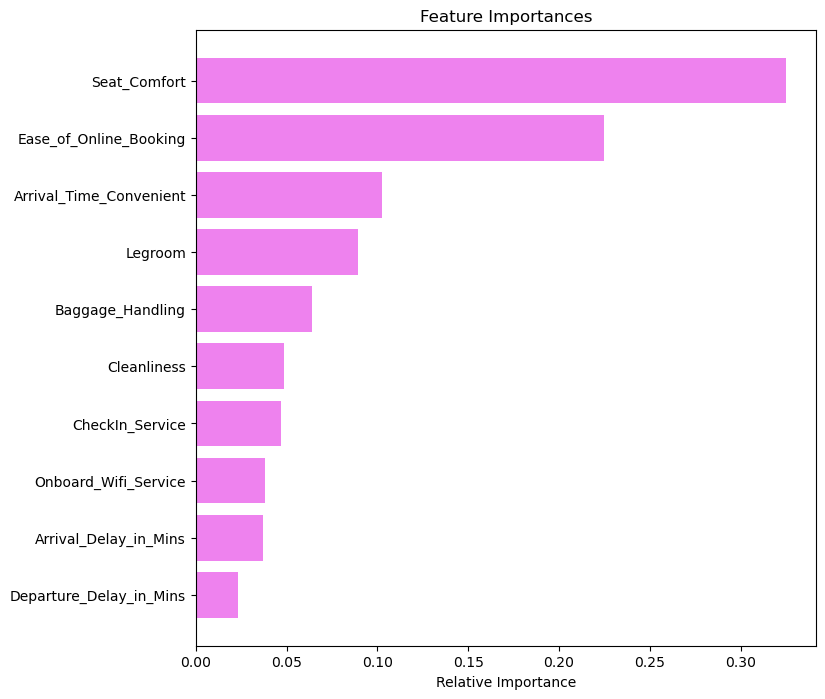

In [52]:
importances = model_9.feature_importances_
indices = np.argsort(importances)
feature_names = list(x4_train.columns)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

-----------------------
## **Compare all Models**
-----------------------
* All models are now compared by looking at their accuracy

In [53]:
# Printing the accuracy of each model
model = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9']
accuracy = [[accuracy_score(y_test, y_pred_test_1), accuracy_score(y_test, y_pred_test_2), accuracy_score(y_test, y_pred_test_3),
            accuracy_score(y_test, y_pred_test_4), accuracy_score(y_test, y_pred_test_5),
            accuracy_score(y_test, y_pred_test_6), accuracy_score(y2_test, y2_pred_test_7),
            accuracy_score(y3_test, y3_pred_test_8), accuracy_score(y4_test, y4_pred_test_9)]]

pd.DataFrame(accuracy, columns = model).T.sort_values(by = 0,ascending = False)

,0
Model 9,0.883709
Model 5,0.880646
Model 8,0.878652
Model 7,0.877587
Model 6,0.861718
Model 3,0.857925
Model 4,0.857534
Model 1,0.759219
Model 2,0.758672


**Observations:**
* Model 9 scored the highest accuracy, followed by model 5 and 8.
* Model 5 was the best model before the dataset adjustment. Models 7,8 and 9 are the new ones. All score similar.
* Model 9 scores better then model 5, which means the adjustment is an improvement.